In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import numpy as np
import matplotlib.pyplot as plt

In [13]:
iris = load_iris(as_frame=True)
df = iris.frame
X = df[iris.feature_names]
y = df["target"]
class_names = iris.target_names

print(df.head())


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [14]:
model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall    (macro): {recall:.3f}")
print(f"F1        (macro): {f1:.3f}\n")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

Accuracy : 0.967
Precision (macro): 0.970
Recall    (macro): 0.967
F1        (macro): 0.967

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



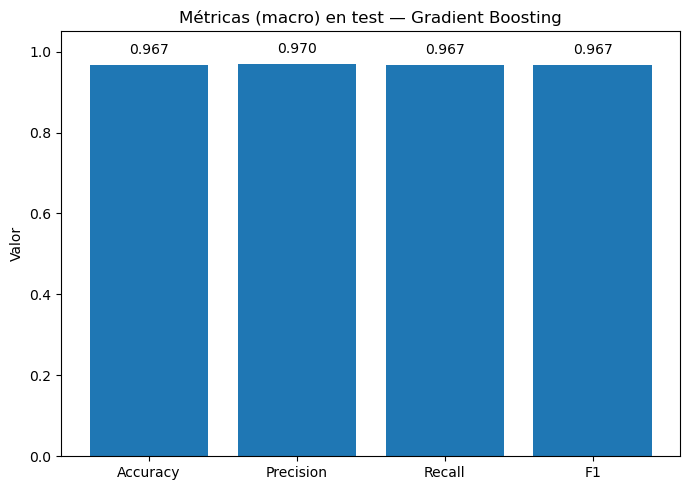

In [15]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas (macro) en test — Gradient Boosting")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, h + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

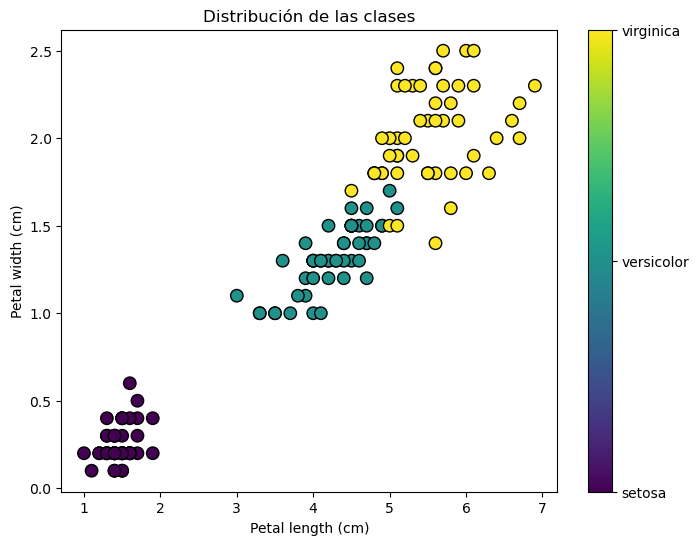

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["petal length (cm)"],
    df["petal width (cm)"],
    c=df["target"], cmap="viridis", edgecolor="k", s=80
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Distribución de las clases")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.show()

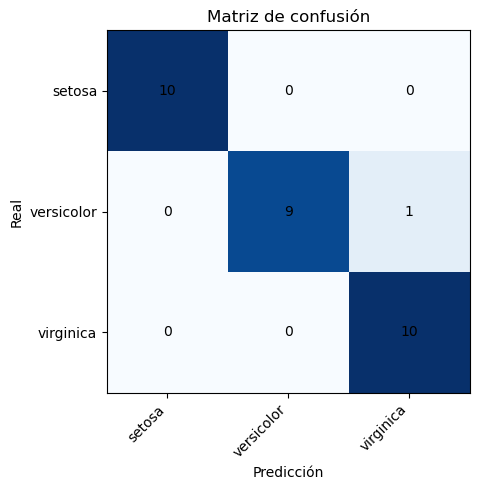

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Matriz de confusión")
plt.xticks(ticks=[0,1,2], labels=class_names, rotation=45, ha='right')
plt.yticks(ticks=[0,1,2], labels=class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

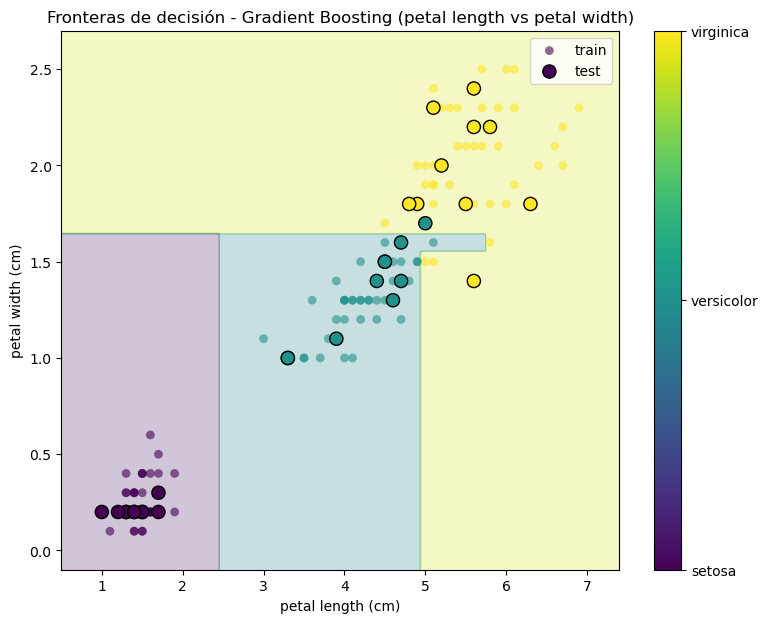

In [18]:
feat_x = "petal length (cm)"
feat_y = "petal width (cm)"
X2_train = X_train[[feat_x, feat_y]].to_numpy()
X2_test  = X_test[[feat_x, feat_y]].to_numpy()

model2d = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
model2d.fit(X2_train, y_train)

# malla para el plano 2D
x_min, x_max = X[[feat_x]].min().item()-0.5, X[[feat_x]].max().item()+0.5
y_min, y_max = X[[feat_y]].min().item()-0.2, X[[feat_y]].max().item()+0.2
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = model2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y_train, cmap="viridis",
            s=40, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X2_test[:,0],  X2_test[:,1],  c=y_test,  cmap="viridis",
            s=90, edgecolor="k",   label="test")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title("Fronteras de decisión - Gradient Boosting (petal length vs petal width)")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.legend()
plt.show()
